In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image as kimage

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
PATH = '/content/gdrive/My Drive/data/image_retrieval2/'
data = np.load(PATH+'images_mr.npy', allow_pickle=True)
print(data.shape)

data = data.astype(np.float32)
print(type(data[0,0,0,0]))

(9908, 86, 128, 3)
<class 'numpy.float32'>


(1, 86, 128, 3)
<class 'numpy.ndarray'>


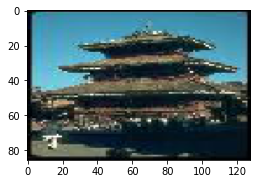

In [3]:
# load query
query = kimage.load_img(PATH+'q2.jpg', target_size=(86, 128))
query_np = kimage.img_to_array(query) #(86, 128, 3)

query_np = np.expand_dims(query_np, axis=0)  # (1, 86, 128, 3)
print(query_np.shape)
print(type(query_np))

# show query
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(query_np[0]/255.0)

In [6]:
# compute abs
query_np = np.reshape(query_np,  (1, -1))
data  = np.reshape(data, (data.shape[0], -1))

query_np_tile = np.tile(query_np, (data.shape[0], 1))
print(query_np_tile.shape)
print(data.shape)

distances = np.absolute(query_np_tile - data)
distances = np.sum(distances, axis=1)
print(distances.shape)

(9908, 33024)
(9908, 33024)
(9908,)


In [7]:
def getKey(item):
    return item[0]

lists = [i for i in range(data.shape[0])]
tp = zip(distances.tolist(), lists)
tp_s = sorted(tp, key=getKey, reverse=False)

for i in range(8):
    print(tp_s[i])

(0.0, 3425)
(1450069.0, 3077)
(1461719.0, 4788)
(1467597.0, 960)
(1468987.0, 3109)
(1484211.0, 3445)
(1489901.0, 2611)
(1493113.0, 1651)


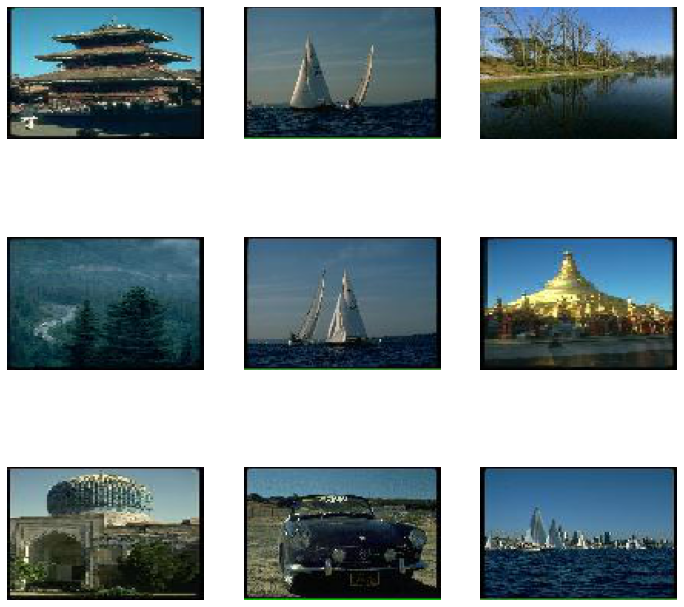

In [8]:
fig = plt.figure(figsize=(12,12))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    index = tp_s[i-1][1]
    img = data[index]
    fig.add_subplot(rows, columns, i)
    
    plt.axis('off')
    plt.imshow(img.reshape((86, 128, 3))/255.0)